<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(3_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n20.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,66.351441,97.926449,822.196691,996.474581,417.006807,579.467774
1,0.0,1.0,84.107038,45.665056,-949.182573,-809.410479,120.384627,-929.795106
2,0.0,2.0,68.358149,60.531338,493.038872,631.928359,192.555533,439.372826
3,0.0,3.0,52.001557,23.303357,13.522325,98.827239,-51.834378,150.661617
4,0.0,4.0,82.992735,59.579300,324.892600,477.464635,203.480626,273.984010
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,38.974523,79.902376,-171.090139,-42.213240,290.699393,-332.912633
119996,999.0,116.0,74.594377,25.399666,-12.087237,97.906806,-45.977729,143.884534
119997,999.0,117.0,49.945427,75.199090,1076.454624,1211.599141,237.292751,974.306390
119998,999.0,118.0,37.381506,29.980790,-36.002343,41.359953,87.845977,-46.486024


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,66.351441,97.926449,822.196691,996.474581,417.006807,579.467774
1,0.0,1.0,84.107038,45.665056,-949.182573,-809.410479,120.384627,-929.795106
2,0.0,2.0,68.358149,60.531338,493.038872,631.928359,192.555533,439.372826
3,0.0,3.0,52.001557,23.303357,13.522325,98.827239,-51.834378,150.661617
4,0.0,4.0,82.992735,59.579300,324.892600,477.464635,203.480626,273.984010
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,38.974523,79.902376,-171.090139,-42.213240,290.699393,-332.912633
119996,999.0,116.0,74.594377,25.399666,-12.087237,97.906806,-45.977729,143.884534
119997,999.0,117.0,49.945427,75.199090,1076.454624,1211.599141,237.292751,974.306390
119998,999.0,118.0,37.381506,29.980790,-36.002343,41.359953,87.845977,-46.486024


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    66.351441  97.926449   822.196691   996.474581  417.006807   
      1.0    84.107038  45.665056  -949.182573  -809.410479  120.384627   
      2.0    68.358149  60.531338   493.038872   631.928359  192.555533   
      3.0    52.001557  23.303357    13.522325    98.827239  -51.834378   
      4.0    82.992735  59.579300   324.892600   477.464635  203.480626   
...                ...        ...          ...          ...         ...   
999.0 115.0  38.974523  79.902376  -171.090139   -42.213240  290.699393   
      116.0  74.594377  25.399666   -12.087237    97.906806  -45.977729   
      117.0  49.945427  75.199090  1076.454624  1211.599141  237.292751   
      118.0  37.381506  29.980790   -36.002343    41.359953   87.845977   
      119.0  26.367426  71.578969 -1066.200131  -958.253736  294.936660   

                   e_hat  
rep   index               
0.0   0.0     579.467774  
      1.0    -929.795106  
      2.0     439.372826  
      3.0     150.661617  
      4.0     273.984010  
...                  ...  
999.0 115.0  -332.912633  
      116.0   143.884534  
      117.0   974.306390  
      118.0   -46.486024  
      119.0 -1253.190396  

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    66.351441  97.926449   822.196691   996.474581  417.006807   
      1.0    84.107038  45.665056  -949.182573  -809.410479  120.384627   
      2.0    68.358149  60.531338   493.038872   631.928359  192.555533   
      3.0    52.001557  23.303357    13.522325    98.827239  -51.834378   
      4.0    82.992735  59.579300   324.892600   477.464635  203.480626   
...                ...        ...          ...          ...         ...   
999.0 115.0  38.974523  79.902376  -171.090139   -42.213240  290.699393   
      116.0  74.594377  25.399666   -12.087237    97.906806  -45.977729   
      117.0  49.945427  75.199090  1076.454624  1211.599141  237.292751   
      118.0  37.381506  29.980790   -36.002343    41.359953   87.845977   
      119.0  26.367426  71.578969 -1066.200131  -958.253736  294.936660   

                   e_hat  
rep   index               
0.0   0.0     579.467774  
      1.0    -929.795106  
      2.0     439.372826  
      3.0     150.661617  
      4.0     273.984010  
...                  ...  
999.0 115.0  -332.912633  
      116.0   143.884534  
      117.0   974.306390  
      118.0   -46.486024  
      119.0 -1253.190396  

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,66.351441,97.926449,822.196691,996.474581,417.006807,579.467774
1,0.0,1.0,84.107038,45.665056,-949.182573,-809.410479,120.384627,-929.795106
2,0.0,2.0,68.358149,60.531338,493.038872,631.928359,192.555533,439.372826
3,0.0,3.0,52.001557,23.303357,13.522325,98.827239,-51.834378,150.661617
4,0.0,4.0,82.992735,59.579300,324.892600,477.464635,203.480626,273.984010
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,38.974523,79.902376,-171.090139,-42.213240,290.699393,-332.912633
119996,999.0,116.0,74.594377,25.399666,-12.087237,97.906806,-45.977729,143.884534
119997,999.0,117.0,49.945427,75.199090,1076.454624,1211.599141,237.292751,974.306390
119998,999.0,118.0,37.381506,29.980790,-36.002343,41.359953,87.845977,-46.486024


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    66.351441  97.926449   822.196691   996.474581  417.006807   
      1.0    84.107038  45.665056  -949.182573  -809.410479  120.384627   
      2.0    68.358149  60.531338   493.038872   631.928359  192.555533   
      3.0    52.001557  23.303357    13.522325    98.827239  -51.834378   
      4.0    82.992735  59.579300   324.892600   477.464635  203.480626   
...                ...        ...          ...          ...         ...   
999.0 115.0  38.974523  79.902376  -171.090139   -42.213240  290.699393   
      116.0  74.594377  25.399666   -12.087237    97.906806  -45.977729   
      117.0  49.945427  75.199090  1076.454624  1211.599141  237.292751   
      118.0  37.381506  29.980790   -36.002343    41.359953   87.845977   
      119.0  26.367426  71.578969 -1066.200131  -958.253736  294.936660   

                   e_hat  
rep   index               
0.0   0.0     579.467774  
      1.0    -929.795106  
      2.0     439.372826  
      3.0     150.661617  
      4.0     273.984010  
...                  ...  
999.0 115.0  -332.912633  
      116.0   143.884534  
      117.0   974.306390  
      118.0   -46.486024  
      119.0 -1253.190396  

[120000 rows x 6 columns]

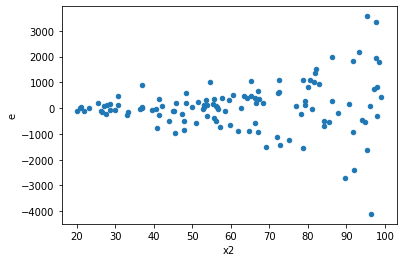

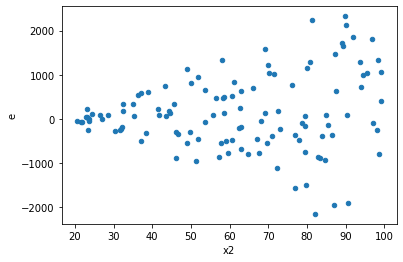

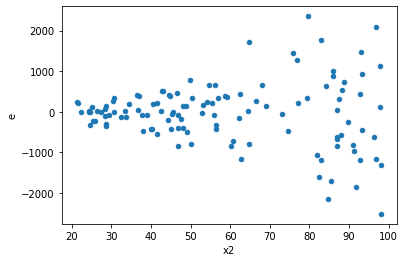

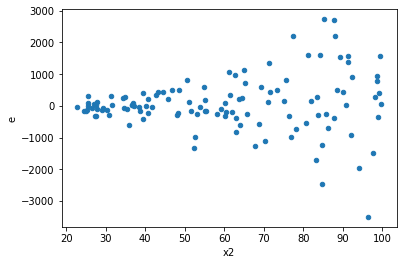

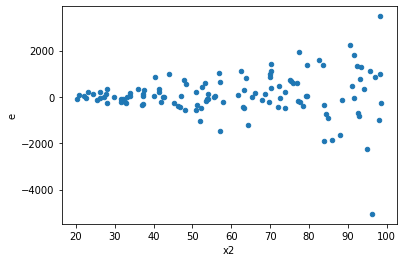

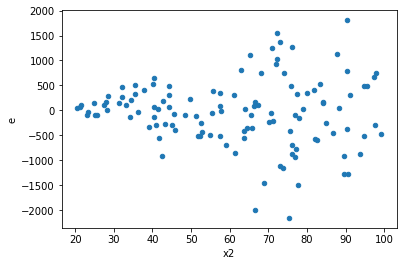

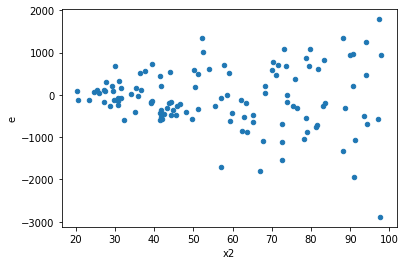

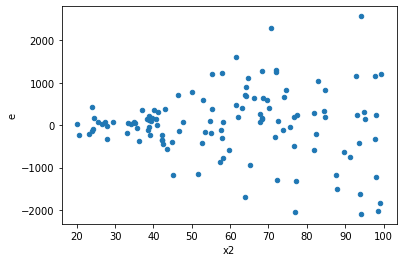

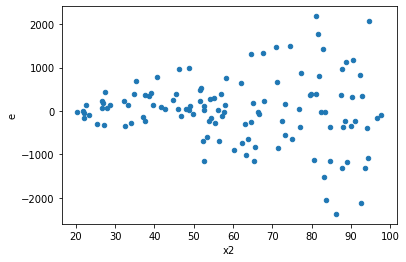

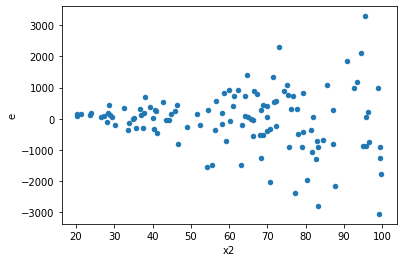

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,6295591.395002134,97433435.68969098,136860.6825000464,2118118.167167195,15.476454804077695,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,8447246.440791313,55487914.727661654,183635.7921911155,1206259.0158187316,6.568757655715288,2.561314715876506e-09,0.9999999987193426,1.280657357938253e-09,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,4105404.8190157064,58763920.320928514,89247.93084816753,1277476.5287158373,14.313794354393897,1.1102230246251565e-15,0.9999999999999994,5.551115123125783e-16,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,2976014.759670184,78703550.79862788,64695.97303630835,1710946.7564919104,26.445954457346232,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,6054468.358051769,82563235.47129726,131618.8773489515,1794852.9450282014,13.636744068783075,2.886579864025407e-15,0.9999999999999986,1.4432899320127035e-15,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,4134344.9990792307,36333515.97707582,89877.06519737458,789859.0429799092,8.788215783919277,1.4031442674422578e-11,0.9999999999929843,7.015721337211289e-12,Reject001=0 : Heteroscedasticity
6.0,46.0,46.0,4752499.673463907,44792158.4568093,103315.21029269363,973742.5751480282,9.424968234487448,3.8054004392051866e-12,0.9999999999980973,1.9027002196025933e-12,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,5780660.002517734,50689821.98183654,125666.52179386378,1101952.6517790554,8.76886410198124,1.461586407458526e-11,0.9999999999926921,7.30793203729263e-12,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,6802554.463981809,52180378.67058371,147881.61878221325,1134356.0580561676,7.6707035492135445,1.6754642118144147e-10,0.9999999999162268,8.377321059072074e-11,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,6295591.395002134,97433435.68969098,136860.6825000464,2118118.167167195,15.476454804077695,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,8447246.440791313,55487914.727661654,183635.7921911155,1206259.0158187316,6.568757655715288,2.561314715876506e-09,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,4105404.8190157064,58763920.320928514,89247.93084816753,1277476.5287158373,14.313794354393897,1.1102230246251565e-15,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,2976014.759670184,78703550.79862788,64695.97303630835,1710946.7564919104,26.445954457346232,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,6054468.358051769,82563235.47129726,131618.8773489515,1794852.9450282014,13.636744068783075,2.886579864025407e-15,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,4134344.9990792307,36333515.97707582,89877.06519737458,789859.0429799092,8.788215783919277,1.4031442674422578e-11,Reject001=0 : Heteroscedasticity
6.0,46.0,46.0,4752499.673463907,44792158.4568093,103315.21029269363,973742.5751480282,9.424968234487448,3.8054004392051866e-12,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,5780660.002517734,50689821.98183654,125666.52179386378,1101952.6517790554,8.76886410198124,1.461586407458526e-11,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,6802554.463981809,52180378.67058371,147881.61878221325,1134356.0580561676,7.6707035492135445,1.6754642118144147e-10,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64